In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
from tensorflow.keras import optimizers, layers, models
from matplotlib import pyplot as plt

## Data Prep

In [3]:
image_dir = "images/lattice_points"
train_files = [[], []]

for file in os.listdir(os.path.join(image_dir, "no")):
    train_files[0].append(os.path.join(image_dir, "no", file))

for file in os.listdir(os.path.join(image_dir, "yes")):
    train_files[1].append(os.path.join(image_dir, "yes", file))

In [4]:
train_images = []
train_labels = []

for i in range(2):
    for file in train_files[i]:
        img = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        
        img = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)[1]
        img = cv2.Canny(img, 0, 255)
        
        img = img.astype(np.float32) / 255.0
        
        train_images.append(img)
        
        label = [0, 0]
        label[i] = 1
        train_labels.append(label)

train_images = np.array(train_images)[..., np.newaxis]
train_labels = np.array(train_labels)

In [5]:
print(train_images.shape, train_labels.shape)
print(train_images.max())
print(train_labels[0])

(56, 21, 21, 1) (56, 2)
1.0
[1 0]


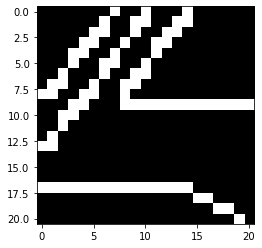

In [6]:
plt.figure()
plt.imshow(train_images[0][:, :, 0], cmap="gray")

In [7]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=180,
    horizontal_flip=True,
    vertical_flip=True)

## Initialize Network

In [8]:
model = models.Sequential()
model.add(layers.Dense(441, input_shape=(21, 21, 1)))

for i in range(2):
    for j in [3, 2, 1]:
        model.add(layers.Conv2D(16, j, activation="elu"))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.BatchNormalization())
    
model.add(layers.Dense(128, activation="elu"))
model.add(layers.Dropout(0.5))
model.add(layers.Flatten())

model.add(layers.Dense(2, activation="softmax"))
model.compile(optimizers.RMSprop(lr=1e-3), loss="categorical_crossentropy", metrics=["categorical_accuracy"])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 21, 21, 441)       882       
_________________________________________________________________
conv2d (Conv2D)              (None, 19, 19, 16)        63520     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 18, 18, 16)        1040      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 16)        272       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 9, 9, 16)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 9, 9, 16)          64        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 16)          2

In [10]:
def generate_data(train_images, train_labels, batch_size):
    gen = datagen.flow(train_images, train_labels, batch_size=batch_size)
    while True:
        x, y = gen.next()
        yield x, y

In [12]:
batch_size = train_images.shape[0]
epochs = 100

history = model.fit_generator(generate_data(train_images, train_labels, batch_size=batch_size),
                              steps_per_epoch=train_images.shape[0] / batch_size,
                              epochs=epochs)

Epoch 1/100
1/1 [==============================] - 0s 298ms/step - loss: 0.2111 - categorical_accuracy: 0.9464
Epoch 2/100
1/1 [==============================] - 0s 275ms/step - loss: 0.1699 - categorical_accuracy: 0.9643
Epoch 3/100
1/1 [==============================] - 0s 256ms/step - loss: 0.1063 - categorical_accuracy: 0.9464
Epoch 4/100
1/1 [==============================] - 0s 262ms/step - loss: 0.0695 - categorical_accuracy: 0.9821
Epoch 5/100
1/1 [==============================] - 0s 286ms/step - loss: 0.2080 - categorical_accuracy: 0.9107
Epoch 6/100
1/1 [==============================] - 0s 265ms/step - loss: 0.1893 - categorical_accuracy: 0.9107
Epoch 7/100
1/1 [==============================] - 0s 261ms/step - loss: 0.0818 - categorical_accuracy: 0.9821
Epoch 8/100
1/1 [==============================] - 0s 279ms/step - loss: 0.1288 - categorical_accuracy: 0.9643
Epoch 9/100
1/1 [==============================] - 0s 271ms/step - loss: 0.1391 - categorical_accuracy: 0.9643
E

Epoch 75/100
1/1 [==============================] - 0s 398ms/step - loss: 0.0540 - categorical_accuracy: 0.9643
Epoch 76/100
1/1 [==============================] - 0s 381ms/step - loss: 0.0513 - categorical_accuracy: 0.9821
Epoch 77/100
1/1 [==============================] - 0s 300ms/step - loss: 0.0777 - categorical_accuracy: 0.9643
Epoch 78/100
1/1 [==============================] - 0s 291ms/step - loss: 0.1284 - categorical_accuracy: 0.9464
Epoch 79/100
1/1 [==============================] - 0s 315ms/step - loss: 0.0688 - categorical_accuracy: 0.9643
Epoch 80/100
1/1 [==============================] - 0s 315ms/step - loss: 0.0929 - categorical_accuracy: 0.9643
Epoch 81/100
1/1 [==============================] - 0s 283ms/step - loss: 0.0630 - categorical_accuracy: 0.9643
Epoch 82/100
1/1 [==============================] - 0s 270ms/step - loss: 0.0869 - categorical_accuracy: 0.9643
Epoch 83/100
1/1 [==============================] - 0s 264ms/step - loss: 0.0300 - categorical_accuracy: